# Load functions

In [1]:
import pandas as pd

#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

from src.data_preprocessing import get_aggregated_train_test_split , preprocessing  , custom_processing
from src.evaluation import get_results
from src.supervised import supervised_model

# Loading partially preprocessed data

In [2]:
train_df_mean ,test_df_mean = get_aggregated_train_test_split(sample = False)
train_df_mean.shape , test_df_mean.shape

((367130, 190), (91783, 190))

In [3]:
train_df_mean ,test_df_mean = get_aggregated_train_test_split(sample = True)
train_df_mean.shape , test_df_mean.shape

((6635, 190), (1659, 190))

# Preporcessing data

In [9]:
x_train , x_test , y_train , y_test = preprocessing(train_df_mean, test_df_mean)

((6635, 188), (6635,), (1659, 188), (1659,))

## Custom processing

In [ ]:
x_train , x_test , y_train , y_test = custom_processing(x_train , x_test , y_train , y_test)

x_train.shape , y_train.shape , x_test.shape,y_test.shape

## Model creation

In [5]:
#!pip install xgboost
from xgboost import XGBClassifier

model = XGBClassifier()

# Trainer creation

In [7]:
trainer = supervised_model(model)

## Trainer train

In [ ]:
trainer.train(x_train , y_train)

## Trainer prediction

In [ ]:
y_pred , y_pred_proba = trainer.predict(x_test)

## Generate results and prediction file

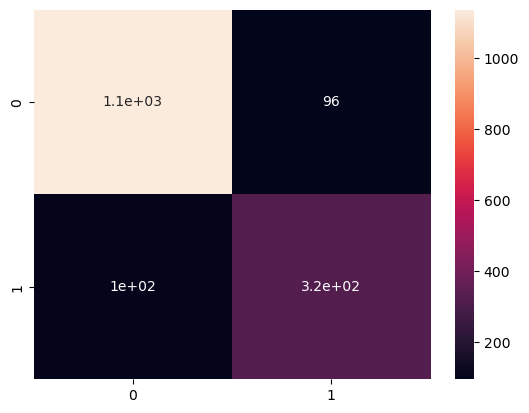

In [8]:
output_dict , submission_df  = get_results(test_df_mean , y_test , y_pred , y_pred_proba)

In [12]:
output_dict

{'0': {'precision': 0.9169354838709678,
  'recall': 0.9221411192214112,
  'f1-score': 0.919530934088152,
  'support': 1233},
 '1': {'precision': 0.7708830548926014,
  'recall': 0.7582159624413145,
  'f1-score': 0.7644970414201182,
  'support': 426},
 'accuracy': 0.8800482218203737,
 'macro avg': {'precision': 0.8439092693817847,
  'recall': 0.8401785408313629,
  'f1-score': 0.842013987754135,
  'support': 1659},
 'weighted avg': {'precision': 0.8794319668457814,
  'recall': 0.8800482218203737,
  'f1-score': 0.8797211460974454,
  'support': 1659},
 'conf_matrix': array([[1137,   96],
        [ 103,  323]]),
 'amex_metric': 0.688273209574153}

In [11]:
submission_df

,customer_ID,prediction
0,0001812036f1558332e5c0880ecbad70b13a6f28ab04a8...,0.933903
1,0002d381bdd8048d76719042cf1eb63caf53b636f8aacd...,0.000216
2,0003e58375faf90552b2861c1ccea4ee5757827cbb6ecd...,0.001997
3,0004837f0c785928a29a6f83f70f4a1c54caec483a773f...,0.138020
4,0006a80d96aec1d178bf74adab6cbf9e4bf427a6ba264f...,0.962635
...,...,...
1654,049bc796f66fe526d66544b8cdf789473a8e8eda7d37d9...,0.000663
1655,049be6c2f737cb4f3d7c77010d21110711e7a4331f92cf...,0.329903
1656,049c0de62d168d8b1322654ceea096d02818f4925050dd...,0.003021
1657,049c3acfa864d185115cf19bff770240a90bc10c5a73bf...,0.000139


# Save Submission file for Kaggle 

In [10]:
submission_df.to_csv("submission.csv" , index = False)